# Talus Data Correlation Analysis

Look at how proteins are correlated across treatments.

See if they are generally in agreement or if correlations vary wildly.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import MScausality.data_analysis.gene_set as gs

## Load data

In [2]:
msstats_data = pd.read_csv("../../data/Talus/processed_data/ProteinLevelData.csv")

In [4]:
msstats_data.head()

,RUN,Protein,LogIntensities,originalRUN,GROUP,SUBJECT,TotalGroupMeasurements,NumMeasuredFeature,MissingPercentage,more50missing,NumImputedFeature
0,1,1433B_HUMAN,12.873423,230719_THP-1_Chrom_end2end_Plate1_DMSO_A02_DIA,DMSO,2,1210,10,0.0,False,0
1,2,1433B_HUMAN,12.866217,230719_THP-1_Chrom_end2end_Plate1_DMSO_A05_DIA,DMSO,5,1210,10,0.0,False,0
2,3,1433B_HUMAN,12.686827,230719_THP-1_Chrom_end2end_Plate1_DMSO_A10_DIA,DMSO,10,1210,10,0.0,False,0
3,4,1433B_HUMAN,12.625462,230719_THP-1_Chrom_end2end_Plate1_DMSO_A12_DIA,DMSO,12,1210,10,0.0,False,0
4,5,1433B_HUMAN,12.538365,230719_THP-1_Chrom_end2end_Plate1_DMSO_B01_DIA,DMSO,13,1210,10,0.0,False,0


## Calculate correlations by group

In [6]:
dmso_only = msstats_data.loc[msstats_data["GROUP"] == "DMSO"]
dmso_dbet = msstats_data.loc[msstats_data["GROUP"].isin(["DMSO", "DbET6"])]

In [14]:
dmso_only_input = gs.prep_msstats_data(dmso_only, gene_map=None, parse_gene=True)
dmso_only_input = dmso_only_input.reset_index(drop=True)
dmso_only_input.columns.name = None
dmso_corr_data = gs.gen_correlation_matrix(dmso_only_input, methods=["pearson"], abs_corr=True)

dmso_dbet_input = gs.prep_msstats_data(dmso_dbet, gene_map=None, parse_gene=True)
dmso_dbet_input = dmso_dbet_input.reset_index(drop=True)
dmso_dbet_input.columns.name = None
dmso_dbet_corr_data = gs.gen_correlation_matrix(dmso_dbet_input, methods=["pearson"], abs_corr=True)

all_input = gs.prep_msstats_data(msstats_data, gene_map=None, parse_gene=True)
all_input = all_input.reset_index(drop=True)
all_input.columns.name = None
all_corr_data = gs.gen_correlation_matrix(all_input, methods=["pearson"], abs_corr=True)

Correlation matrix for pearson:
Correlation matrix for pearson:
Correlation matrix for pearson:


In [15]:
dmso_dbet_corr_data = dmso_dbet_corr_data["pearson"].rename(columns={"value": "DMSO_DBET"})
dmso_corr_data = dmso_corr_data["pearson"].rename(columns={"value": "DMSO"})
all_corr_data = all_corr_data["pearson"].rename(columns={"value": "All"})

merged_data = pd.merge(dmso_corr_data, dmso_dbet_corr_data, how="outer", on="index")
merged_data = pd.merge(merged_data, all_corr_data, how="outer", on="index")

In [16]:
merged_data.loc[:, "diff"] = merged_data.loc[:, "All"] - merged_data.loc[:, "DMSO"]

<Axes: >

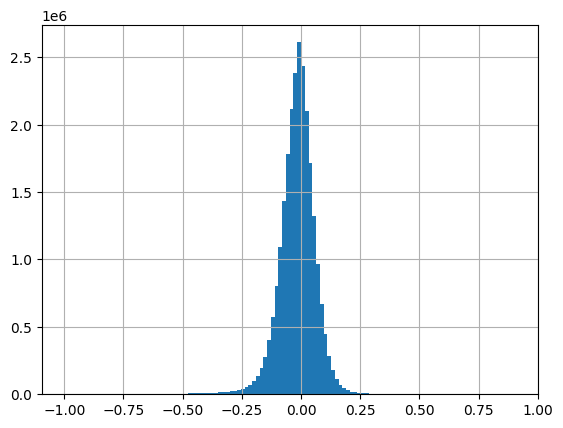

In [17]:
merged_data.loc[:, "diff"].hist(bins=120)

<Axes: >

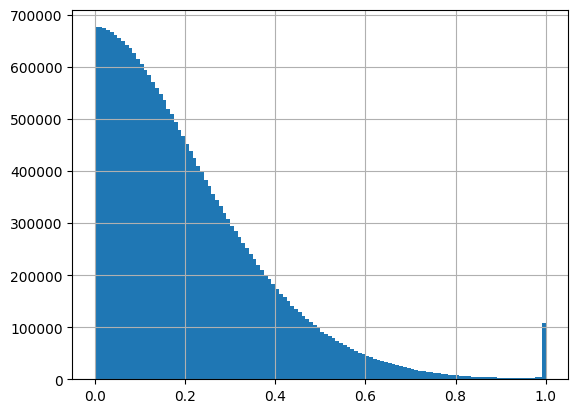

In [19]:
merged_data.loc[:, "DMSO"].hist(bins=120)

In [45]:
merged_data.loc[(merged_data["DMSO"] > .6) & (["BRD2" in i for i in merged_data["index"].values])]

/tmp/ipykernel_6385/1742998582.py:1: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  merged_data.loc[(merged_data["DMSO"] > .6) & (["BRD2" in i for i in merged_data["index"].values])]


,DMSO,index,DMSO_DBET,All,diff
10443,0.618841,"(1433G, BRD2)",0.350445,0.375470,-0.243371
20430,0.603414,"(1433T, BRD2)",0.322322,0.307068,-0.296347
157771,0.935737,"(AATM, BRD2)",0.935737,0.501798,-0.433939
187524,0.618211,"(ABCA3, BRD2)",0.318753,0.358843,-0.259367
242495,0.611276,"(ABI1, BRD2)",0.320264,0.344558,-0.266718
...,...,...,...,...,...
24422435,0.696886,"(ZFR, BRD2)",0.339612,0.376205,-0.320681
24542330,0.620643,"(ZN207, BRD2)",0.336930,0.337285,-0.283358
24697167,0.725067,"(ZN598, BRD2)",0.311546,0.355623,-0.369444
24727152,0.620589,"(ZN638, BRD2)",0.387253,0.390426,-0.230163


In [46]:
msstats_data.head()

,RUN,Protein,LogIntensities,originalRUN,GROUP,SUBJECT,TotalGroupMeasurements,NumMeasuredFeature,MissingPercentage,more50missing,NumImputedFeature
0,1,1433B,12.873423,230719_THP-1_Chrom_end2end_Plate1_DMSO_A02_DIA,DMSO,2,1210,10,0.0,False,0
1,2,1433B,12.866217,230719_THP-1_Chrom_end2end_Plate1_DMSO_A05_DIA,DMSO,5,1210,10,0.0,False,0
2,3,1433B,12.686827,230719_THP-1_Chrom_end2end_Plate1_DMSO_A10_DIA,DMSO,10,1210,10,0.0,False,0
3,4,1433B,12.625462,230719_THP-1_Chrom_end2end_Plate1_DMSO_A12_DIA,DMSO,12,1210,10,0.0,False,0
4,5,1433B,12.538365,230719_THP-1_Chrom_end2end_Plate1_DMSO_B01_DIA,DMSO,13,1210,10,0.0,False,0


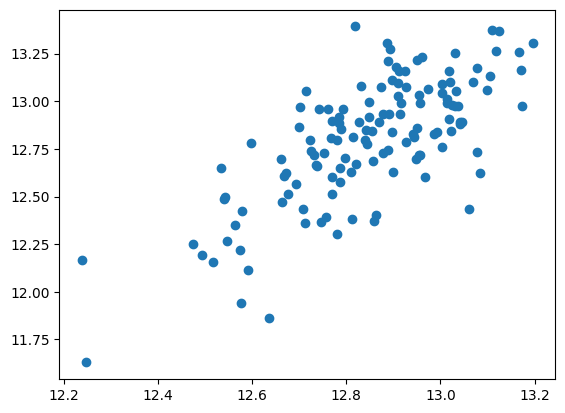

In [48]:
fig, ax = plt.subplots()

piv_data = pd.pivot(dmso_only.loc[:, ["Protein", "RUN", "LogIntensities"]], columns="Protein", index="RUN", values="LogIntensities")
piv_data.head()
ax.scatter(piv_data["ZN598"], piv_data["BRD2"])

In [7]:
groups = msstats_data.loc[:, "GROUP"].unique()
corr_info = dict()

for g in groups[:-1]:

    print("{} start".format(g))
    temp = msstats_data.loc[msstats_data["GROUP"] == g]

    input_data = gs.prep_msstats_data(temp, gene_map=None, parse_gene=True)
    input_data = input_data.reset_index(drop=True)
    input_data.columns.name = None
    corr_data = gs.gen_correlation_matrix(input_data, methods=["pearson"], abs_corr=True)
    corr_info[g] = corr_data
    print("{} finished".format(g))


DMSO start
Correlation matrix for pearson:
DMSO finished
DbET6 start
Correlation matrix for pearson:
DbET6 finished
Jakafi start
Correlation matrix for pearson:
Jakafi finished
K784-3183 start
Correlation matrix for pearson:
K784-3183 finished
K784-3670 start
Correlation matrix for pearson:
K784-3670 finished
K975 start
Correlation matrix for pearson:
K975 finished
Nuc start
Correlation matrix for pearson:
Nuc finished
PF477736 start
Correlation matrix for pearson:
PF477736 finished
VE-821 start
Correlation matrix for pearson:
VE-821 finished


In [8]:
corr_info.keys()

dict_keys(['DMSO', 'DbET6', 'Jakafi', 'K784-3183', 'K784-3670', 'K975', 'Nuc', 'PF477736', 'VE-821'])

In [ ]:
merged_corr = corr_info["DMSO"]["pearson"].rename(columns={"value": "DMSO"})
for g in groups[1:-1]:
    temp = corr_info[g]["pearson"].rename(columns={"value": g})
    merged_corr = pd.merge(merged_corr, temp, how="outer", on="index")

In [ ]:
merged_corr.head()